# Bayesian Ordinal Regression: Full Workflow

**Models**  
- Cumulative (proportional-odds)  
- Partial-odds  

**Steps**  
1. Fake data  
2. Prior predictive checks  
3. Fit both models  
4. Sampler diagnostics  
5. Posterior predictive checks (hist / ECDF / proportions)  
6. Model comparison (LOO)  
7. Prior sensitivity (cumulative)  
8. Influence diagnostics (cumulative)  


In [3]:
# Imports
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

from bayes_ordinal.models.cumulative import cumulative_model
from bayes_ordinal.models.partial_odds import partial_odds_model
from bayes_ordinal.workflow.prior_predictive import run_prior_predictive
from bayes_ordinal.workflow.fitting import fit_model
from bayes_ordinal.workflow.diagnostics import summarize_diagnostics
from bayes_ordinal.workflow.posterior_predictive import run_posterior_predictive
from bayes_ordinal.workflow.cross_validation import compare_models
from bayes_ordinal.workflow.sensitivity import prior_sensitivity, plot_influential

In [4]:
# Fake data
# Tiny fake ordinal data
np.random.seed(42)
n, K = 100, 4
X = np.random.normal(size=(n, 2))
y = np.random.randint(0, K, size=n)

Sampling: [alpha, beta, y_obs]


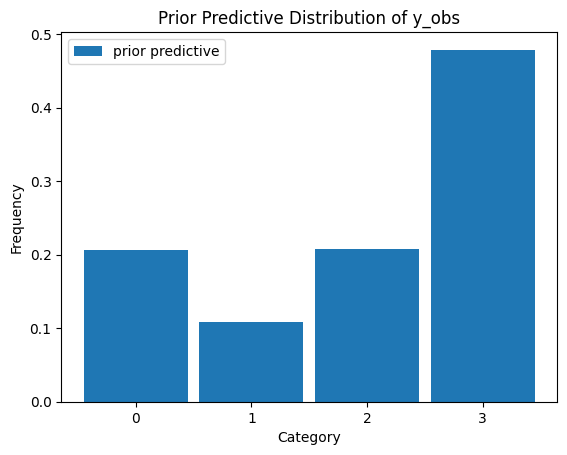

Sampling: [beta, gamma, y_obs]


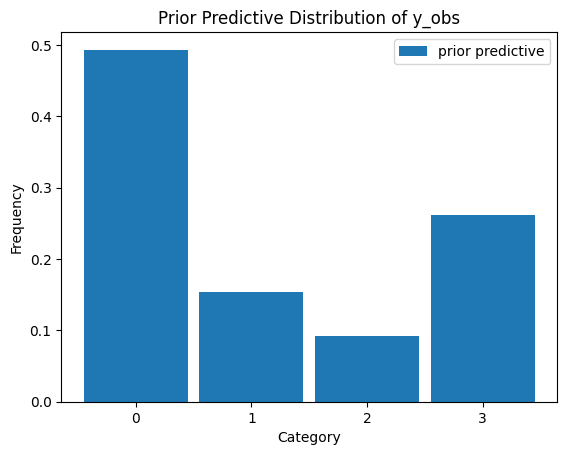

In [5]:
# Prior‐predictive for both models
model_cum = cumulative_model(y, X, K)
_ = run_prior_predictive(model_cum, draws=200, plot=True)

model_par = partial_odds_model(y, X, K)
_ = run_prior_predictive(model_par, draws=200, plot=True)


In [6]:
# Fit both models (full sampling)
idata_cum = fit_model(model_cum, draws=500, tune=500, chains=4)
idata_par = fit_model(model_par, draws=500, tune=500, chains=4)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 0 seconds.


=== Cumulative model diagnostics ===


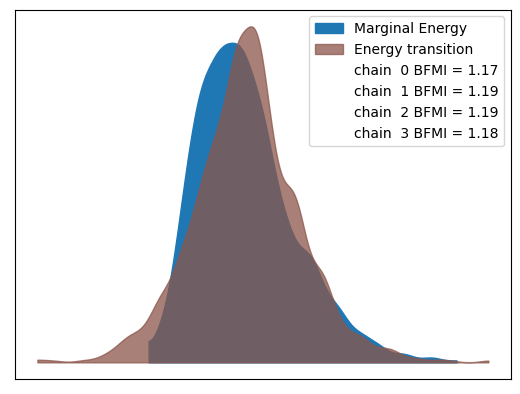

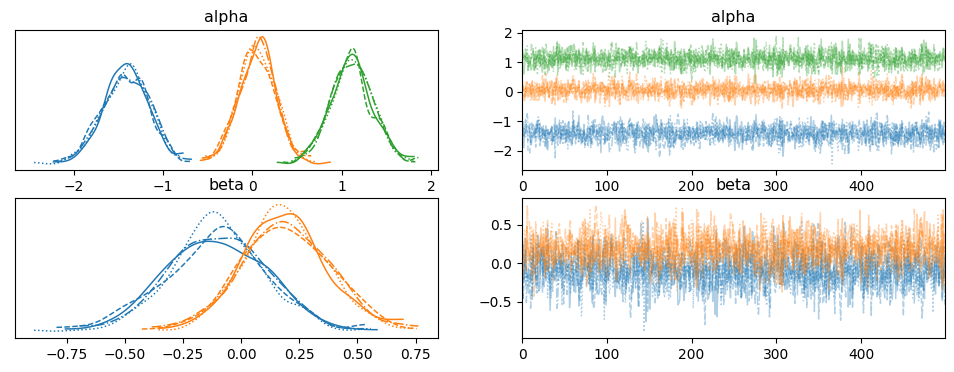

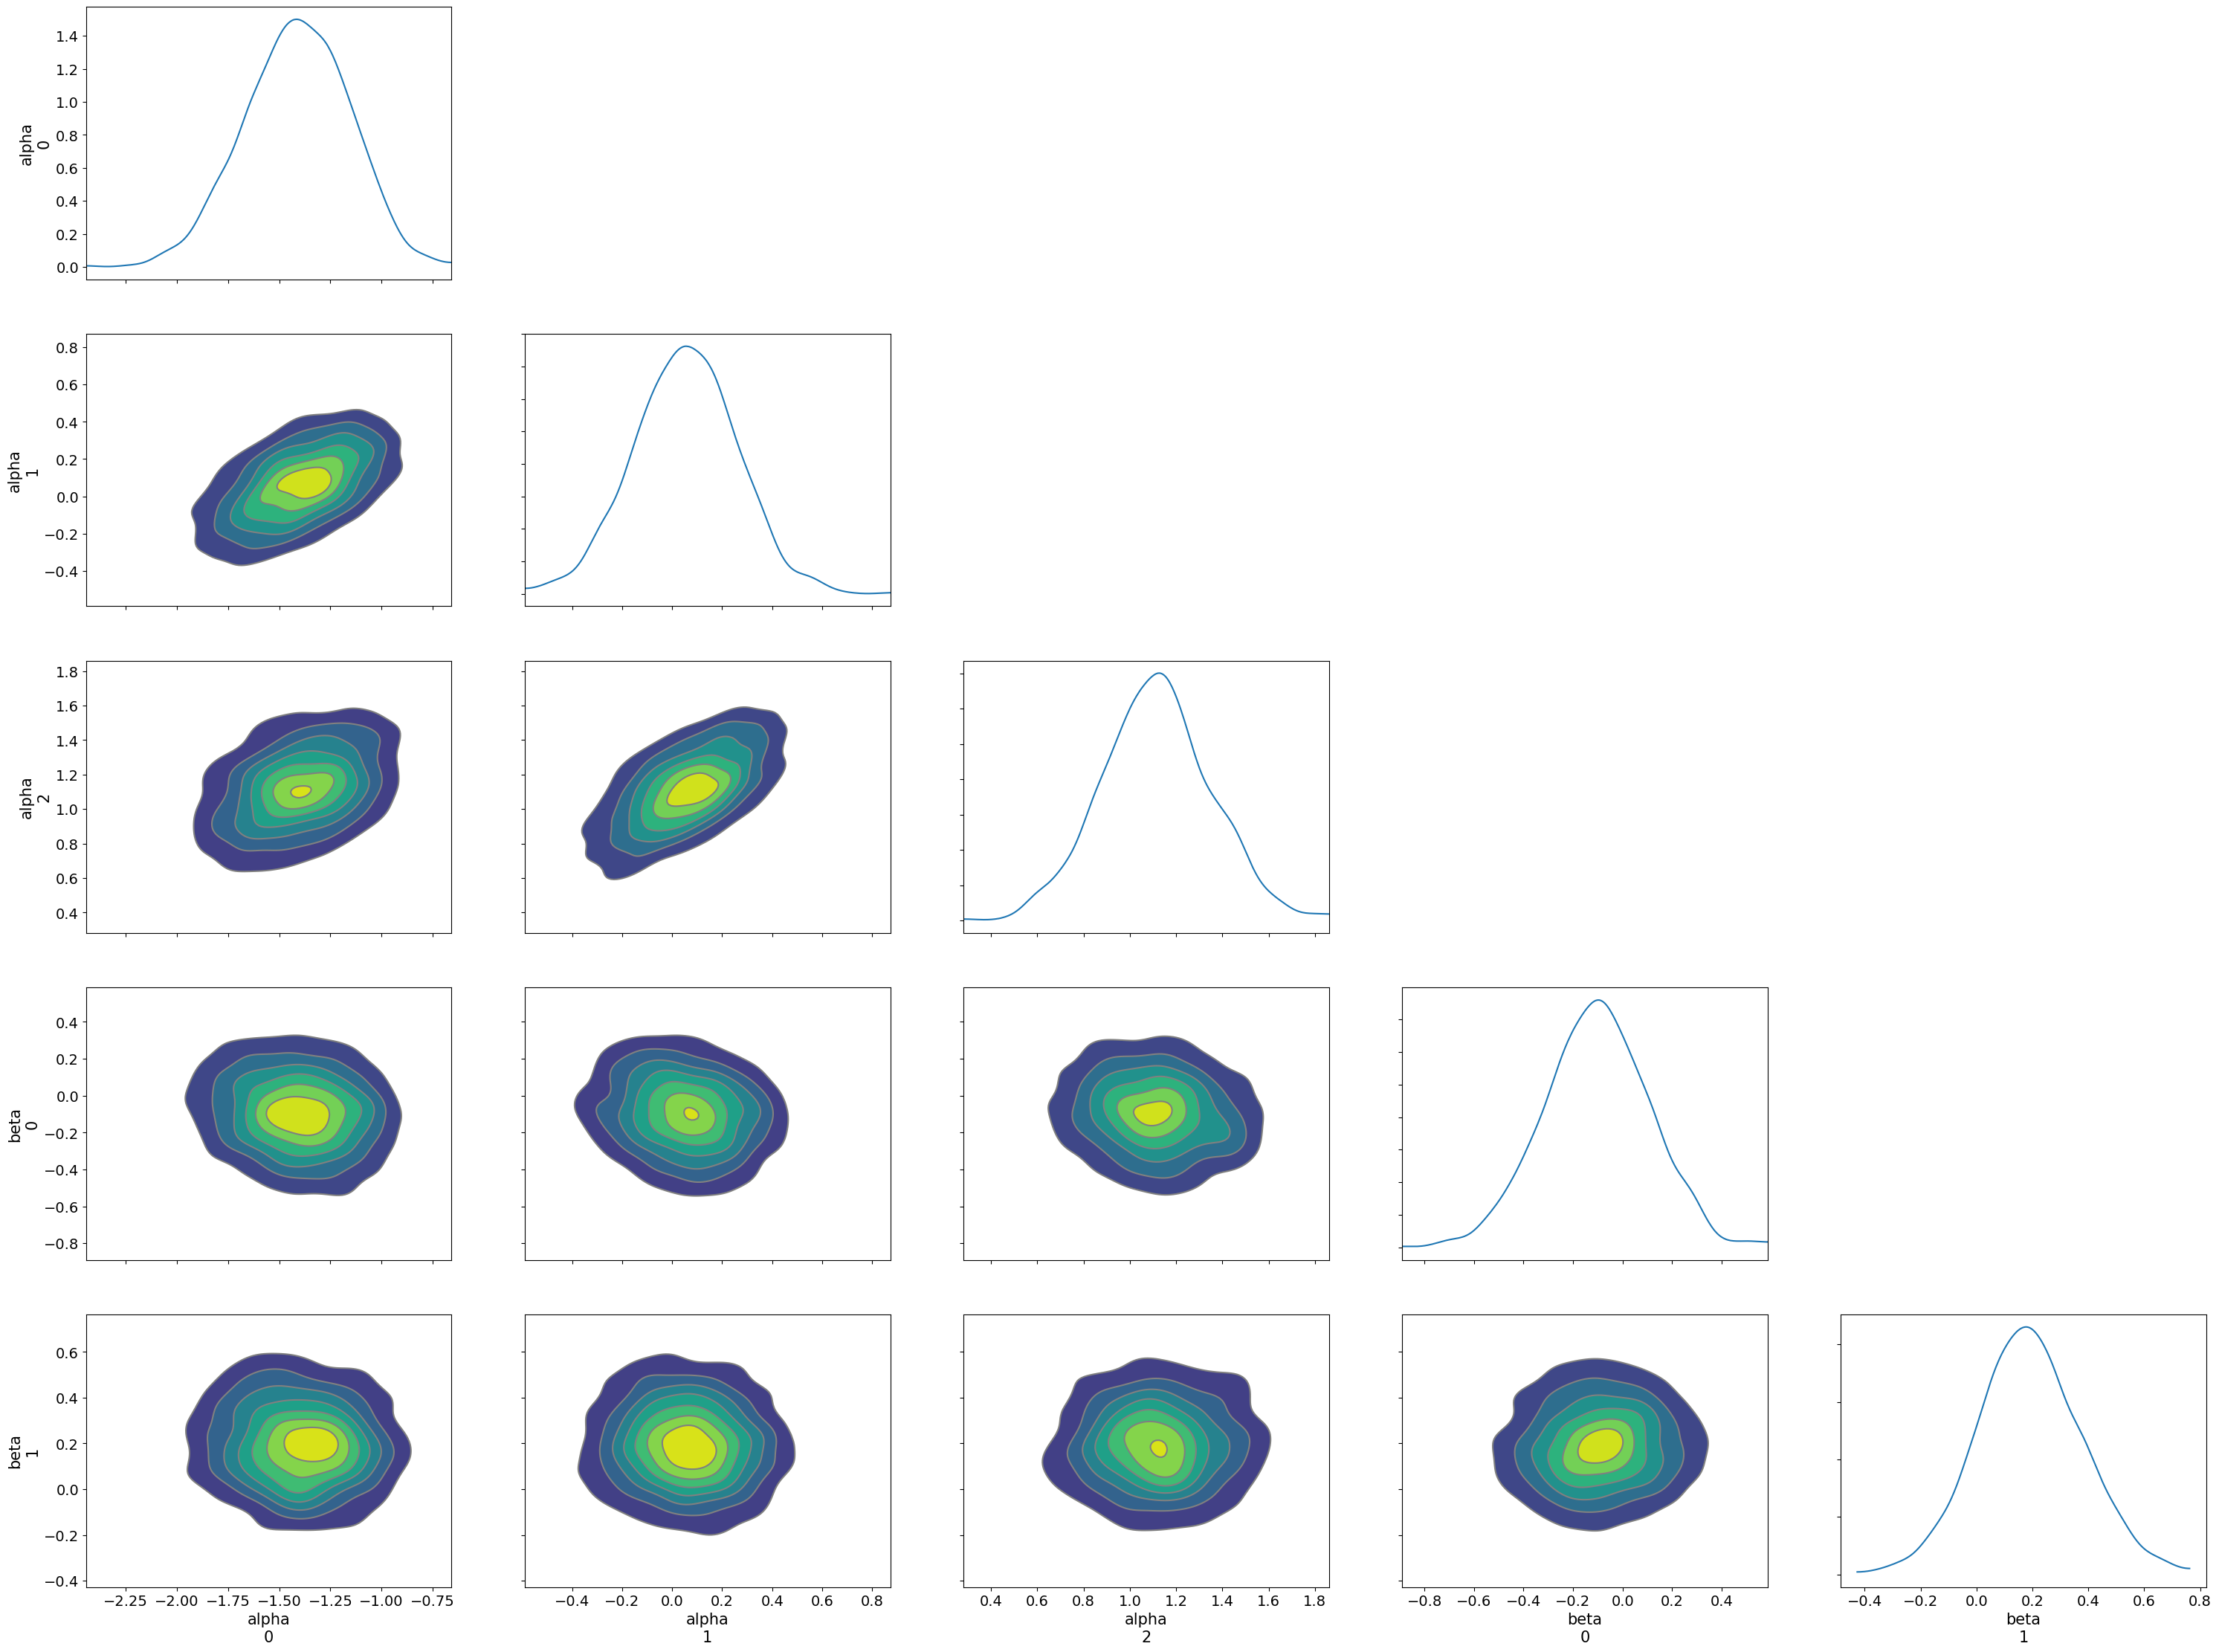

          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha[0] -1.41  0.26   -1.89    -0.95       0.01      0.0   1814.36   1722.71   
alpha[1]  0.05  0.21   -0.35     0.41       0.00      0.0   2627.44   1753.45   
alpha[2]  1.11  0.24    0.66     1.55       0.00      0.0   2558.45   1627.82   
beta[0]  -0.10  0.21   -0.48     0.32       0.00      0.0   2086.07   1512.76   
beta[1]   0.19  0.19   -0.15     0.56       0.00      0.0   2045.87   1440.69   

          r_hat  n_divergences  max_energy_diff  
alpha[0]    1.0              0        11.475476  
alpha[1]    1.0              0        11.475476  
alpha[2]    1.0              0        11.475476  
beta[0]     1.0              0        11.475476  
beta[1]     1.0              0        11.475476  

=== Partial‐odds model diagnostics ===


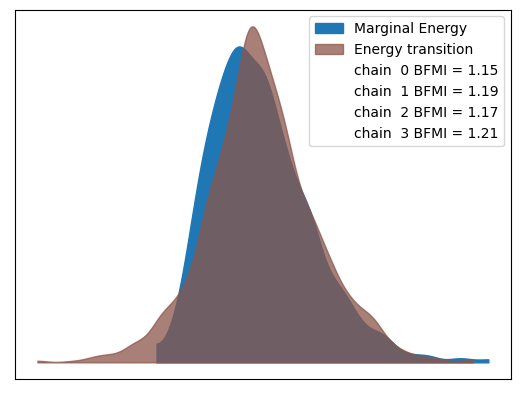

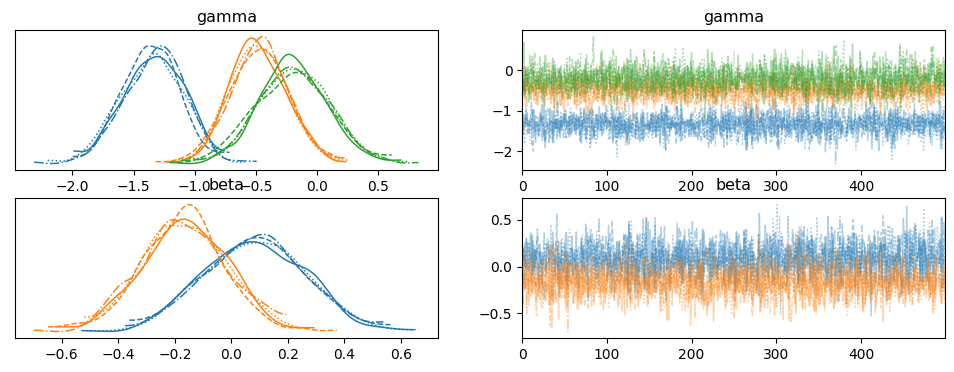

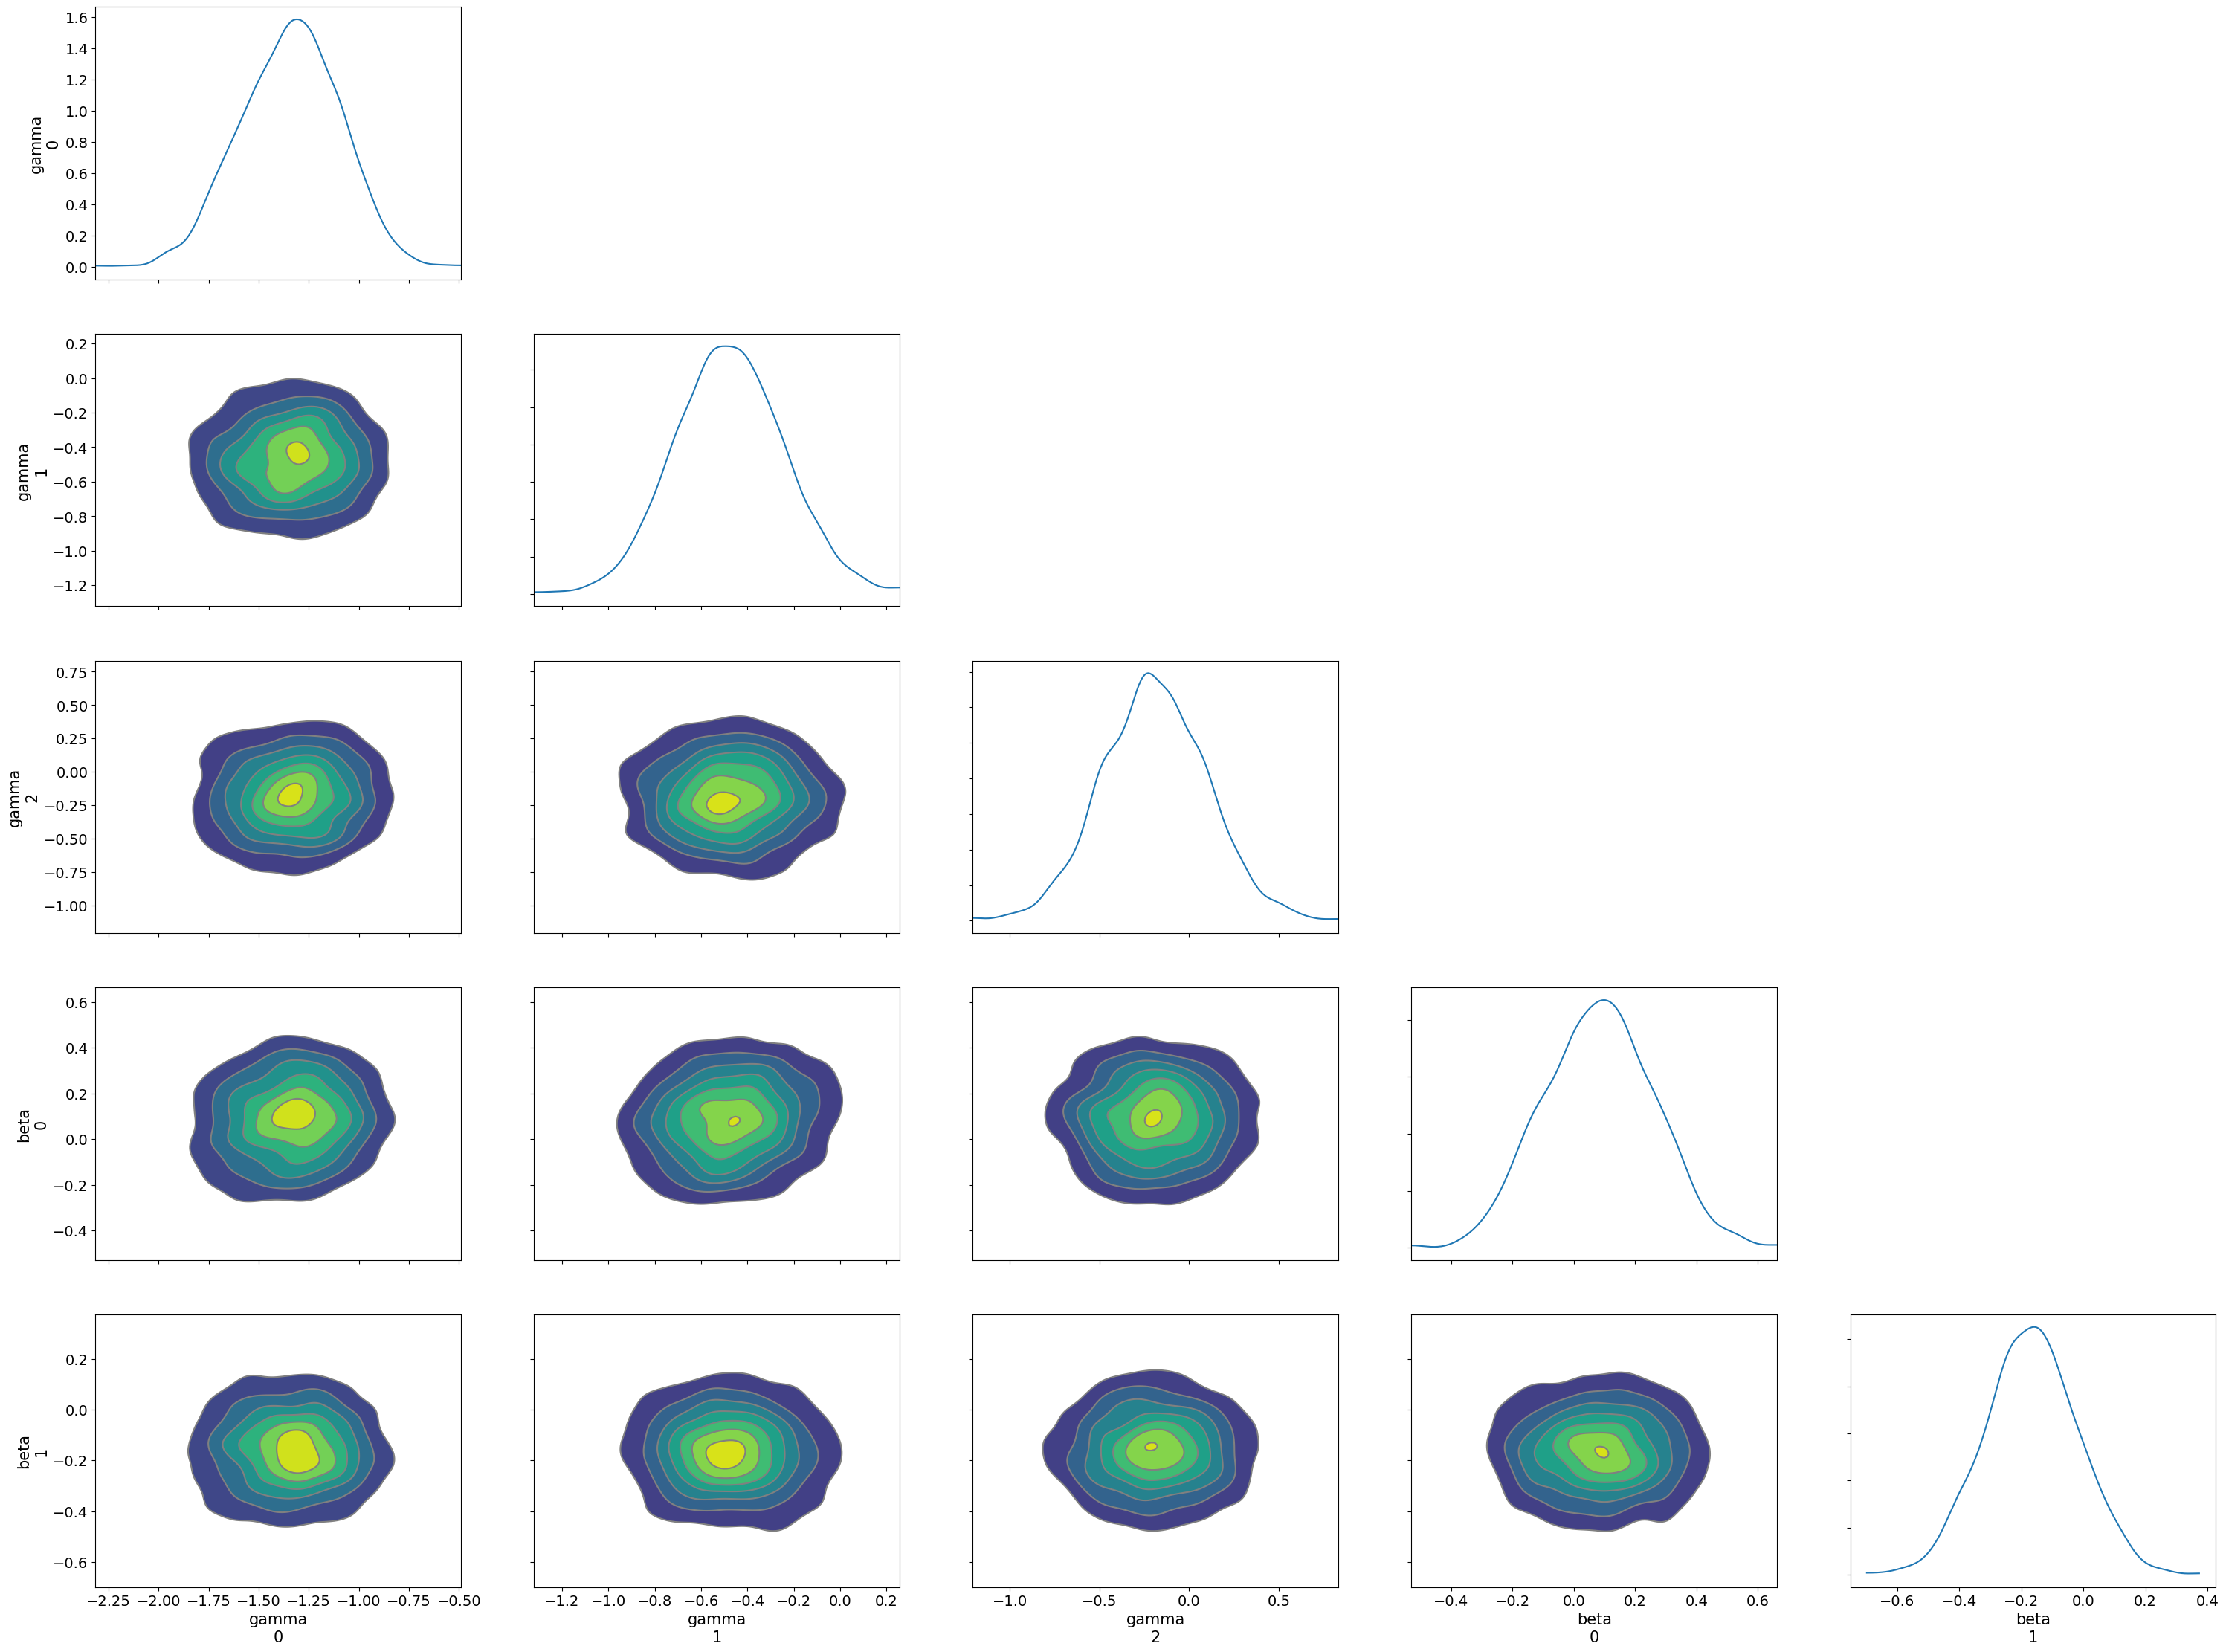

          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
gamma[0] -1.34  0.25   -1.80    -0.90       0.00     0.00   2821.95   1692.55   
gamma[1] -0.48  0.23   -0.90    -0.03       0.00     0.00   2515.59   1603.90   
gamma[2] -0.19  0.29   -0.78     0.31       0.01     0.01   2722.80   1703.61   
beta[0]   0.08  0.18   -0.24     0.41       0.00     0.00   3365.22   1714.26   
beta[1]  -0.17  0.15   -0.46     0.10       0.00     0.00   2628.34   1604.66   

          r_hat  n_divergences  max_energy_diff  
gamma[0]    1.0              0         9.569199  
gamma[1]    1.0              0         9.569199  
gamma[2]    1.0              0         9.569199  
beta[0]     1.0              0         9.569199  
beta[1]     1.0              0         9.569199  


In [7]:
# Sampler diagnostics
print("=== Cumulative model diagnostics ===")
print(summarize_diagnostics(idata_cum, var_names=["alpha", "beta"]))

print("\n=== Partial‐odds model diagnostics ===")
print(summarize_diagnostics(idata_par, var_names=["gamma", "beta"]))


Sampling: [y_obs]


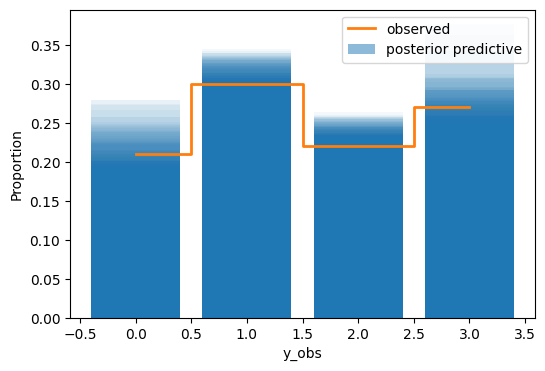

Sampling: [y_obs]


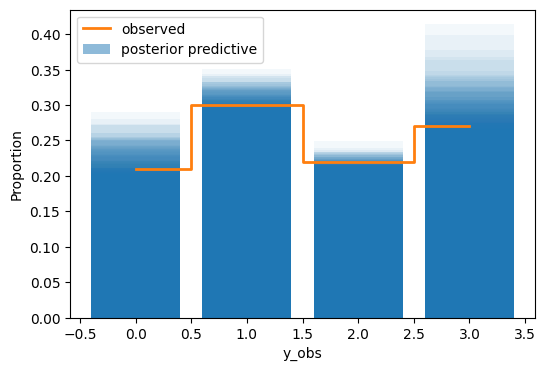

In [8]:
# Cell 5: Posterior predictive checks (proportions view)
_ = run_posterior_predictive(model_cum, idata_cum, kind="proportions")
_ = run_posterior_predictive(model_par, idata_par, kind="proportions")


            rank    elpd_loo     p_loo  elpd_diff        weight        se  \
partial        0  284.322840  5.342690   0.000000  1.000000e+00  3.965982   
cumulative     1  285.064594  5.472293   0.741754  2.220446e-16  4.054344   

                 dse  warning     scale  n_bad_k  
partial     0.000000    False  deviance        0  
cumulative  1.260415    False  deviance        0  


/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'deviance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

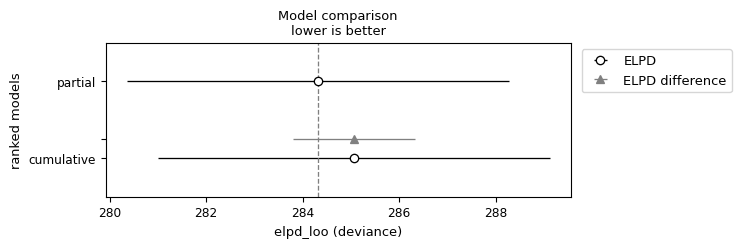

In [9]:
# Cell 6: Model comparison via PSIS‐LOO
comp_df = compare_models(
    models    = {"cumulative": model_cum, "partial": model_par},
    idatas    = {"cumulative": idata_cum,  "partial": idata_par},
    ic        = "loo",
)
print(comp_df)
az.plot_compare(comp_df)
plt.show()


Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 

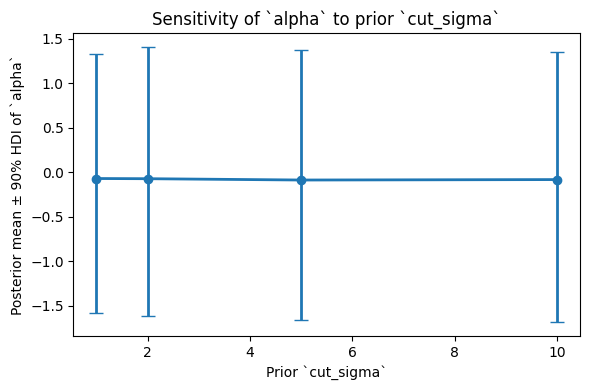

In [18]:
# Cell 7: Prior sensitivity on cumulative cutpoint‐scale
prior_sensitivity(
    build_model = cumulative_model,
    y            = y,
    X            = X,
    K            = K,
    hyper_values       = [1, 2, 5, 10],
    hyper_name   = "cut_sigma",
    trace_var     = "alpha",            # posterior RV to summarize (all α’s)
    draws        = 300,
    tune         = 300,
)

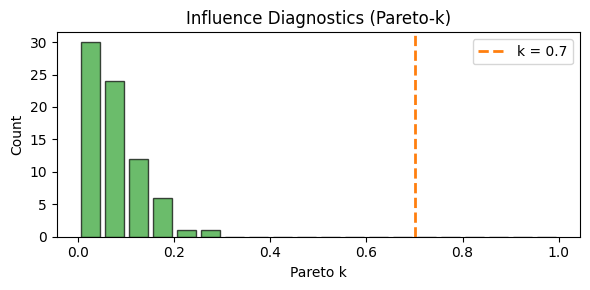

In [20]:
# influence histogram
#  — Note: we force a single color array so plt.hist() sees only one dataset
plot_influential(idata_cum, threshold=0.7, use_az_khat=False)

Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]
Sampling 4 chains for 300 tune and 300 

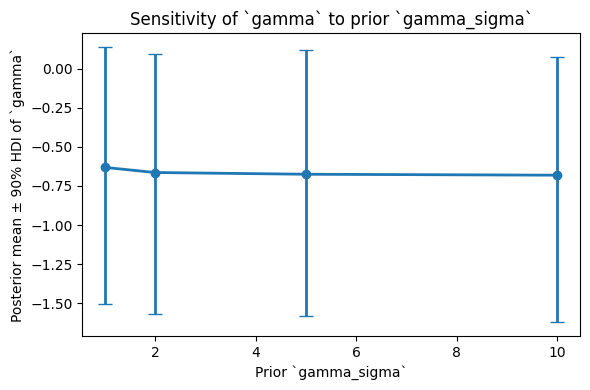

In [22]:
# Prior‐sensitivity for the partial‐odds cut‐point scale (γ)
prior_sensitivity(
    build_model   = partial_odds_model,    # your adjacent‐category model constructor
    y              = y,
    X              = X,
    K              = K,
    hyper_name    = "gamma_sigma",        # which prior hyperparameter to sweep
    hyper_values  = [1, 2, 5, 10],        # grid of scales for γ
    trace_var     = "gamma",              # monitor the K−1 intercepts γ
    draws         = 300,
    tune          = 300,
    chains        = 4,
)


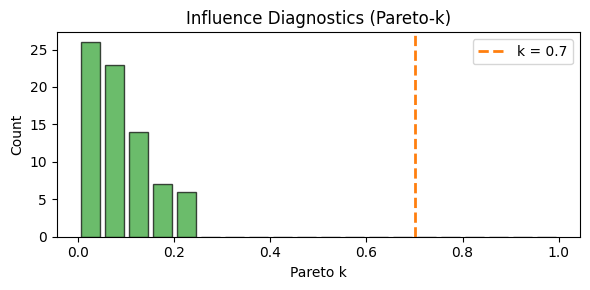

In [24]:
# Influence diagnostics for the partial‐odds model
# → Pareto‐k histogram (use_az_khat=False) or ArviZ scatter (use_az_khat=True)
plot_influential(
    idata_par,         # your fitted InferenceData for partial_odds_model
    threshold=0.7,
    use_az_khat=False  # set True to use az.plot_khat instead
)
